In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:

N = 5
grid = np.array([np.array([x/N for y in range(N)]) for x in range(N)])
print(grid)

[[0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8]]


In [6]:
def sink_check(sinks, x, y):
    return False
    if sinks == []:
        return False
    if (x,y) in sinks:
            return True
    return False


def new_growth_candidates(new_clusteree, growth_candidates, N):
    
    if new_clusteree not in growth_candidates:
        raise 'Oi kan niet'
    
    growth_candidates.remove(new_clusteree)
    if new_clusteree[0] != 0:
        if (new_clusteree[0]-1,new_clusteree[1]) not in growth_candidates:
            growth_candidates.append((new_clusteree[0]-1,new_clusteree[1]))
    if new_clusteree[0] != N-1:
        if (new_clusteree[0]+1,new_clusteree[1]) not in growth_candidates:
            growth_candidates.append((new_clusteree[0]+1,new_clusteree[1]))
    if new_clusteree[1] != 0:
        if (new_clusteree[0],new_clusteree[1]-1) not in growth_candidates:
            growth_candidates.append((new_clusteree[0],new_clusteree[1]-1))
    if new_clusteree[1] != N-1:
        if (new_clusteree[0],new_clusteree[1]+1) not in growth_candidates:
            growth_candidates.append((new_clusteree[0],new_clusteree[1]+1))
        
    return growth_candidates


def successive_over_relaxation(omega=1, eta=1, growth_steps=100, N=100, plot_grid=False, use_pickl=True):
    if use_pickl:
        with open("no_sink_N100.pkl", 'rb') as save_file:
            grid = pickle.load(save_file)

    if True:
        a = 5
    else:
        grid = np.zeros((N, N))
    # grid = np.array([np.array([y/(N) for x in range(N)]) for y in range(N)])
    
    cluster = [(int(N/2),0)]
    growth_candidates = [cluster[0]]
    growth_candidates = new_growth_candidates(cluster[0], growth_candidates, N)

    grid_list = []
    for i in range(growth_steps):
        counter = 0
        delta = 1
        delta_list = []

        while delta > 1e-5 and delta < 1e5 and counter < 1e4:
            print(f'{len(grid_list)} {delta:.2E} {counter}', end='\r')
            # print(f"{max(abs(grid_list[-1] - grid_list[-2]).flatten()):.7f}", end='\r')
            new_grid = grid.copy()
            new_grid[-1] = 1
            for y in range(1, N-1):
                new_grid[y][0] = 0.25 * omega * (grid[y + 1][0] + grid[y - 1][0] + grid[y][1] + grid[y][-1]) + (1 - omega) * grid[y][0] if sink_check(growth_candidates, 0, y) == False else 0
                for x in range(1, N-1):
                    new_grid[y][x] = (1 - omega) * grid[y][x] + omega * 0.25 * (grid[y + 1][x] + new_grid[y - 1][x] + grid[y][x + 1] + new_grid[y][x - 1]) if sink_check(growth_candidates, x, y) == False else 0
                new_grid[y][-1] = 0.25 * omega * (grid[y + 1][-1] + new_grid[y - 1][-1] + grid[y][-2] + new_grid[y][0]) + (1 - omega) * grid[y][-1] if sink_check(growth_candidates, x + 1, y) == False else 0
            
            delta = max(abs(new_grid - grid).flatten())

            grid = new_grid.copy()
            delta_list.append(delta)

            counter += 1
            # if delta <= 1e-5:
            #     with open("no_sink_N100.pkl", 'wb') as save_file:
            #         pickle.dump(grid, save_file)
            #     quit()
        
        growth_chance = []
        for coord in growth_candidates:
            growth_chance.append(grid[coord[0]][coord[1]])

    
        if all(x == growth_chance[0] for x in growth_chance) and growth_chance[0] == 0.0:
            for index in range(len(growth_chance)):
                growth_chance[index] = 1


        sum_chance = 0
        for x in growth_chance:
            sum_chance += x ** eta

        growth_chance_norm = [float(x**eta)/sum_chance for x in growth_chance]

        
        new_growth_index = np.random.choice(np.arange(len(growth_candidates)), 1, p=growth_chance_norm)
        cluster.append(growth_candidates[new_growth_index[0]])
        growth_candidates = new_growth_candidates(growth_candidates[new_growth_index[0]], growth_candidates, N)

        grid_list.append(grid.copy())
    if plot_grid:
        return grid_list[-1], cluster
    return delta_list

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00980785 0.0098085  0.00980804 ... 0.00979839 0.0098027  0.00980584]
 [0.01961656 0.01961783 0.01961689 ... 0.01959766 0.01960624 0.01961253]
 ...
 [0.97958779 0.97958771 0.97958758 ... 0.97958674 0.97958714 0.97958749]
 [0.98979388 0.98979384 0.98979377 ... 0.98979335 0.98979355 0.98979373]
 [1.         1.         1.         ... 1.         1.         1.        ]]


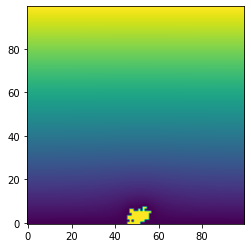

In [8]:
grid, cluster = successive_over_relaxation(omega=1.5, eta=1, growth_steps=100, N=100, plot_grid=True, use_pickl=True)
print(grid)
for coord in cluster:
    grid[coord[1]][coord[0]] = 1
plt.imshow(grid, origin='lower')#, cmap='magma')
plt.show()